# The Black-Scholes Model

The Black-Scholes model is a fundamental mathematical formula in finance for evaluating the theoretical price of European options. Here is a detailed explanation of the formula for both call and put options.

## European Call Option

The formula for the price of a European call option without dividend payments is as follows:

$$
C(S, t) = S_0 \cdot N(d_1) - K \cdot e^{-r(T-t)} \cdot N(d_2)
$$

where:
- $C(S, t)$ represents the price of the call option at time $t$,
- $S_0$ is the current price of the underlying asset,
- $K$ is the option's strike price,
- $T$ is the time to expiration,
- $r$ is the annual risk-free interest rate,
- $\sigma$ is the volatility of the underlying asset's return,
- $N(\cdot)$ is the cumulative distribution function of the standard normal distribution,
- $d_1 = \frac{\ln(S_0 / K) + (r + \sigma^2 / 2) \cdot (T-t)}{\sigma \cdot \sqrt{T-t}}$,
- $d_2 = d_1 - \sigma \cdot \sqrt{T-t}$.

## European Put Option

Similarly, the price of a European put option is given by:

$$
P(S, t) = K \cdot e^{-r(T-t)} \cdot N(-d_2) - S_0 \cdot N(-d_1)
$$

with the same notations as for the call option.

## Explanation of Components

- **$N(d_1)$ and $N(d_2)$**: These adjusted probabilities for the risk-free interest rate and volatility indicate the likelihood of the option being in the money at expiration.
- **$S_0$**: The current price of the underlying asset.
- **$K \cdot e^{-r(T-t)}$**: The present value of the strike price, adjusted for the risk-free interest rate.
- **Volatility $\sigma$**: A measure of the magnitude of fluctuations in the price of the underlying asset.

The Black-Scholes model is based on several assumptions, including the absence of transaction costs, the ability to short-sell, and a market that follows price movements from a log-normal distribution.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paramètres de Black-Scholes
S0 = 100  # Prix actuel de l'actif sous-jacent
K = 102  # Prix d'exercice
T = 250/365  # Durée jusqu'à l'expiration en années
r = 0.003  # Taux d'intérêt sans risque
sigma = 0.2  # Volatilité du rendement de l'actif

# Fonction pour calculer le prix d'un call selon Black-Scholes
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Fonction pour calculer le prix d'un put selon Black-Scholes
def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Échelle de prix de l'actif pour le graphique
S = np.linspace(50, 150, 100)
call_prices = black_scholes_call(S, K, T, r, sigma)
put_prices = black_scholes_put(S, K, T, r, sigma)

# Tracé du graphique
plt.figure(figsize=(10, 5))
plt.plot(S, call_prices, label='Call Price')
plt.plot(S, put_prices, label='Put Price')
plt.xlabel('Prix de l\'actif sous-jacent (S)')
plt.ylabel('Prix de l\'option')
plt.title('Prix d\'option Black-Scholes')
plt.legend()
plt.grid(True)
plt.show()


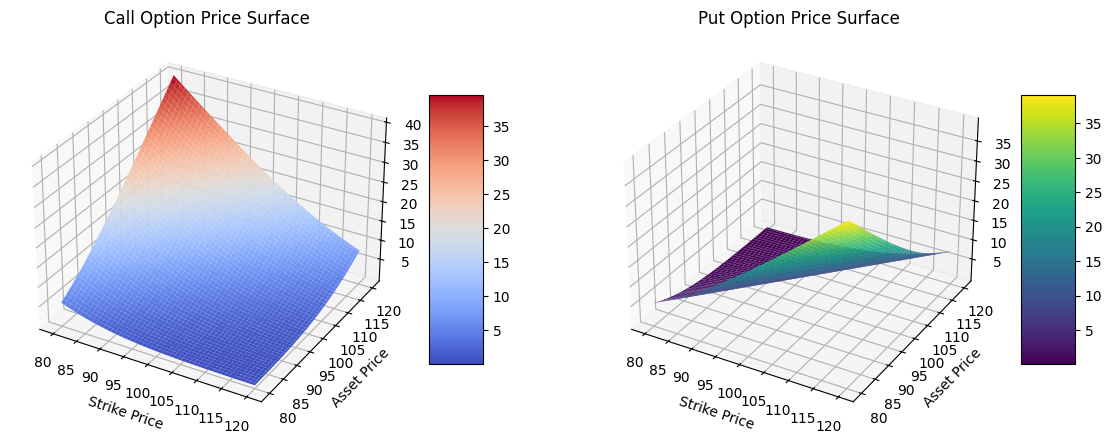

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Black-Scholes Parameters
S0 = 100  # Current price of the underlying asset
T = 250 / 365  # Time to expiration in years
r = 0.003  # Risk-free interest rate
sigma = 0.2  # Volatility of the underlying asset's return

# Grids for underlying asset price and strike price
K = np.linspace(80, 120, 100)
S = np.linspace(80, 120, 100)
K, S = np.meshgrid(K, S)

# Functions to calculate call and put option prices according to Black-Scholes
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Calculate prices for call and put options
call_prices = black_scholes_call(S, K, T, r, sigma)
put_prices = black_scholes_put(S, K, T, r, sigma)

# Create 3D plots for Call and Put
fig = plt.figure(figsize=(14, 7))

# Call plot
ax_call = fig.add_subplot(121, projection='3d')
surf_call = ax_call.plot_surface(K, S, call_prices, cmap='coolwarm', edgecolor='none')
ax_call.set_xlabel('Strike Price')
ax_call.set_ylabel('Asset Price')
ax_call.set_zlabel('Call Option Price')
ax_call.set_title('Call Option Price Surface')
fig.colorbar(surf_call, ax=ax_call, shrink=0.5, aspect=5)

# Put plot
ax_put = fig.add_subplot(122, projection='3d')
surf_put = ax_put.plot_surface(K, S, put_prices, cmap='viridis', edgecolor='none')
ax_put.set_xlabel('Strike Price')
ax_put.set_ylabel('Asset Price')
ax_put.set_zlabel('Put Option Price')
ax_put.set_title('Put Option Price Surface')
fig.colorbar(surf_put, ax=ax_put, shrink=0.5, aspect=5)

# Display the plot
plt.show()
